In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# read data

In [2]:
df=pd.read_csv("stock.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


# # statistics about data

In [4]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


# # sorting


In [5]:
NAN=[(c,df[c].isnull().mean()*100) for c in df]
NAN= pd.DataFrame(NAN,columns=['column_name','percentage'])
NAN

,column_name,percentage
0,Date,0.0
1,Open,0.0
2,High,0.0
3,Low,0.0
4,Last,0.0
5,Close,0.0
6,Total Trade Quantity,0.0
7,Turnover (Lacs),0.0


In [6]:
srt=df.sort_values(by='Date')
srt.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [7]:
srt.reset_index(inplace=True)

In [8]:
srt.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


# Data visualization 

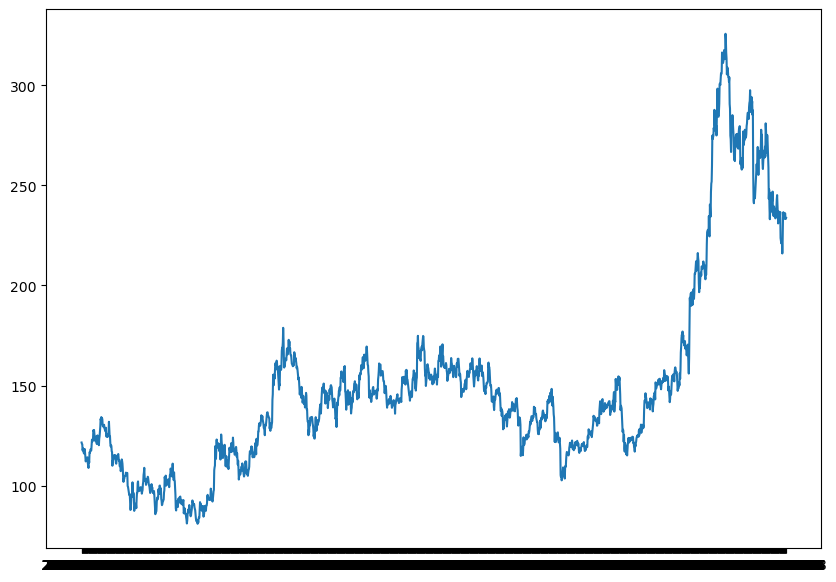

In [9]:
plt.figure(figsize=(10,7))
plt.plot(srt['Date'],srt['Close'])

In [10]:
Close_srt = srt['Close']
Close_srt

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

# Feature scaling(MinMaxscaler)

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
Close_srt = scaler.fit_transform(np.array(Close_srt).reshape(-1,1))
Close_srt

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

# # Splitting and testing


In [12]:
train_size = int(len(Close_srt)*0.7)
test_size = len(Close_srt) - train_size
train_data,test_data = Close_srt [0:train_size,:],Close_srt[train_size:len(Close_srt),:1]

In [13]:
train_data.shape

(1424, 1)

In [14]:
test_data.shape

(611, 1)

# Convert array values into matrix

In [15]:
def create_dataset (dataset, time_step=1):
    dataX,dataY =[],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)    

 # reshaping the data

In [16]:
time_step =100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [17]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [18]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)


In [19]:
X_train

array([[[0.16584967],
        [0.16319444],
        [0.1621732 ],
        ...,
        [0.14011438],
        [0.13848039],
        [0.12479575]],

       [[0.16319444],
        [0.1621732 ],
        [0.14971405],
        ...,
        [0.13848039],
        [0.12479575],
        [0.12254902]],

       [[0.1621732 ],
        [0.14971405],
        [0.15400327],
        ...,
        [0.12479575],
        [0.12254902],
        [0.13010621]],

       ...,

       [[0.18280229],
        [0.19178922],
        [0.19219771],
        ...,
        [0.16441993],
        [0.15236928],
        [0.15482026]],

       [[0.19178922],
        [0.19219771],
        [0.19281046],
        ...,
        [0.15236928],
        [0.15482026],
        [0.15420752]],

       [[0.19219771],
        [0.19281046],
        [0.21058007],
        ...,
        [0.15482026],
        [0.15420752],
        [0.15012255]]])

In [20]:
X_test

array([[[0.1621732 ],
        [0.15951797],
        [0.16707516],
        ...,
        [0.24775327],
        [0.24836601],
        [0.25020425]],

       [[0.15951797],
        [0.16707516],
        [0.15992647],
        ...,
        [0.24836601],
        [0.25020425],
        [0.25020425]],

       [[0.16707516],
        [0.15992647],
        [0.16053922],
        ...,
        [0.25020425],
        [0.25020425],
        [0.23999183]],

       ...,

       [[0.86519608],
        [0.84027778],
        [0.84497549],
        ...,
        [0.62888072],
        [0.62765523],
        [0.62234477]],

       [[0.84027778],
        [0.84497549],
        [0.87111928],
        ...,
        [0.62765523],
        [0.62234477],
        [0.63378268]],

       [[0.84497549],
        [0.87111928],
        [0.85273693],
        ...,
        [0.62234477],
        [0.63378268],
        [0.62622549]]])

# create stacked LSTM model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Prediction and performance checking

In [27]:
model.fit(X_train,y_train,validation_split=0.1 , epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 67s 437ms/step - loss: 0.0146 - val_loss: 0.0013
Epoch 2/60
19/19 [==============================] - 5s 236ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 3/60
19/19 [==============================] - 4s 217ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 4s 209ms/step - loss: 8.7543e-04 - val_loss: 0.0012
Epoch 5/60
19/19 [==============================] - 4s 216ms/step - loss: 8.5612e-04 - val_loss: 0.0012
Epoch 6/60
19/19 [==============================] - 4s 212ms/step - loss: 8.3954e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 4s 210ms/step - loss: 8.0080e-04 - val_loss: 0.0011
Epoch 8/60
19/19 [==============================] - 4s 211ms/step - loss: 8.0153e-04 - val_loss: 0.0010
Epoch 9/60
19/19 [==============================] - 4s 214ms/step - loss: 7.5196e-04 - val_loss: 9.7156e-04
Epoch 10/60
19/19 [==============================] - 5s 238ms/step - lo

In [28]:
train_predict = model.predict(X_train)
test_predict = model.predict (X_test)

16/16 [==============================] - 1s 53ms/step


In [29]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


# Calculating the performance 

In [30]:
import math
from sklearn.metrics import mean_squared_error

In [33]:
math.sqrt(mean_squared_error(y_train,train_predict))


133.44016764373305

In [34]:
math.sqrt(mean_squared_error(y_test,test_predict))

205.34419766625123

# Graph with train and test data with actual data

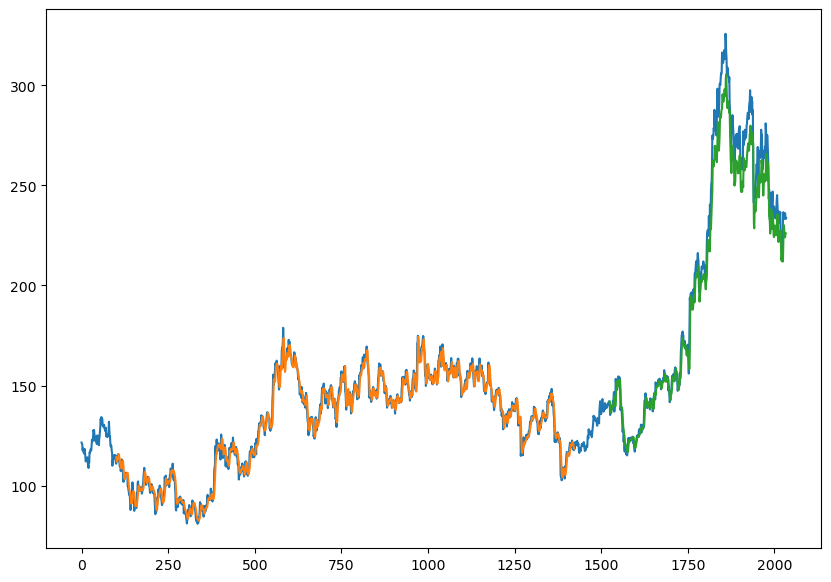

In [36]:
look_back=100
#train
trainPredictPlot = np.empty_like(Close_srt)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
#test
testPredictPlot = np.empty_like(Close_srt)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back)*2+1:len(Close_srt)-1,:] = test_predict
#plot baseline and predictions
plt.figure(figsize=(10,7))
plt.plot(scaler.inverse_transform(Close_srt))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Prediction for next 30 days

In [37]:
len(test_data)


611

In [38]:
pred_input=test_data[511:].reshape(1,-1)
pred_input.shape

(1, 100)

In [39]:
temp_input=list(pred_input)
temp_input=temp_input[0].tolist()


In [40]:
temp_input


[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [61]:
lst_output = []  # predicted 30 days output
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > n_steps:
        pred_input = np.array(temp_input[-n_steps:])  # Use the last n_steps elements
        pred_input = pred_input.reshape((1, n_steps, 1))
        yhat = model.predict(pred_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        pred_input = np.array(temp_input)
        pred_input = pred_input.reshape((1, len(pred_input), 1))
        yhat = model.predict(pred_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
        
print(lst_output)


[[0.5098309516906738], [0.48778024315834045], [0.46947944164276123], [0.4543788433074951], [0.4418482780456543], [0.4312576353549957], [0.4220360815525055], [0.4137158989906311], [0.4059534966945648], [0.39852699637413025], [0.39131960272789], [0.3842943012714386], [0.3774668872356415], [0.37088072299957275], [0.36458706855773926], [0.35863053798675537], [0.3530418276786804], [0.34783434867858887], [0.3430050313472748], [0.3385377526283264], [0.3344065845012665], [0.33058077096939087], [0.32702770829200745], [0.32371610403060913], [0.3206173777580261], [0.31770679354667664], [0.3149639070034027], [0.3123719096183777], [0.30991730093955994], [0.3075892925262451]]


In [63]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [64]:
len(Close_srt)

2035

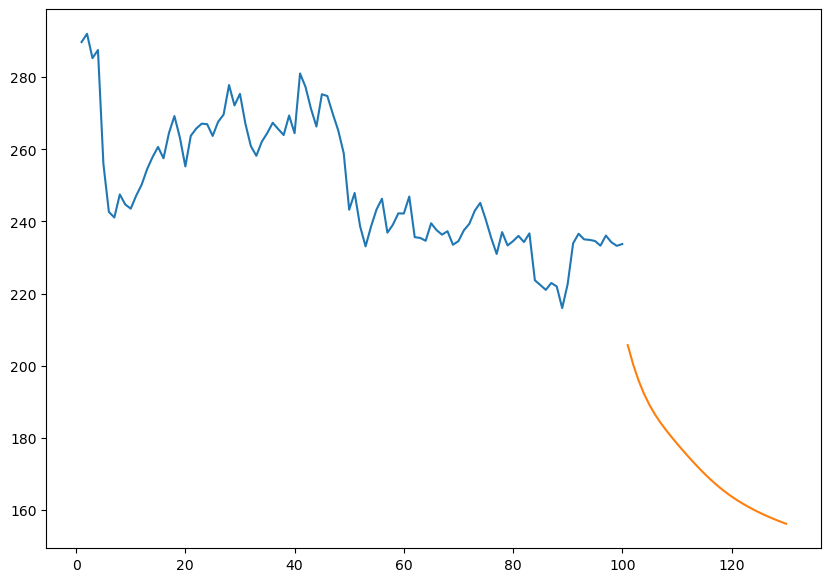

In [67]:
plt.figure(figsize=(10,7))
plt.plot(day_new,scaler.inverse_transform(Close_srt[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


# continous graph

In [68]:
df3=Close_srt.tolist()
df3.extend(lst_output)

In [69]:
print(len(df3))

2065


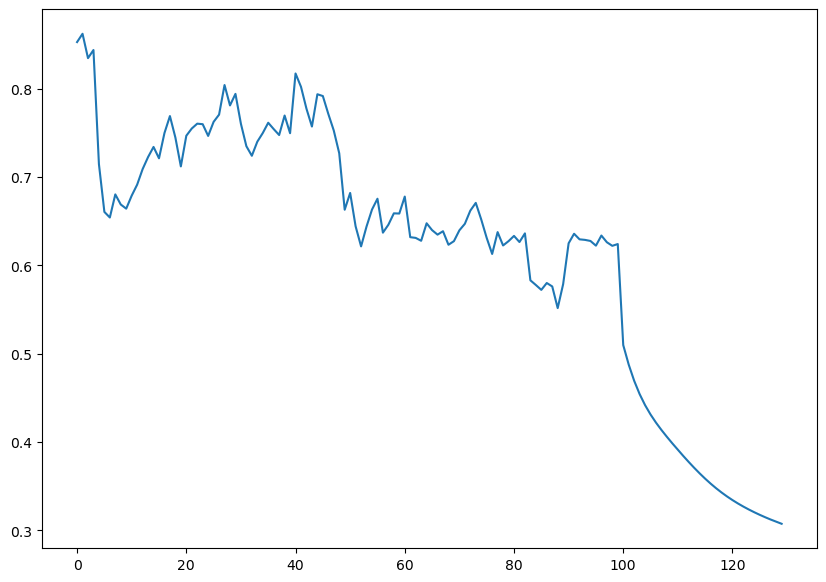

In [70]:
plt.figure(figsize=(10,7))
plt.plot(df3[1935:])

# plotting the graph with predicted 30 days output

In [71]:
df3=scaler.inverse_transform(df3).tolist()


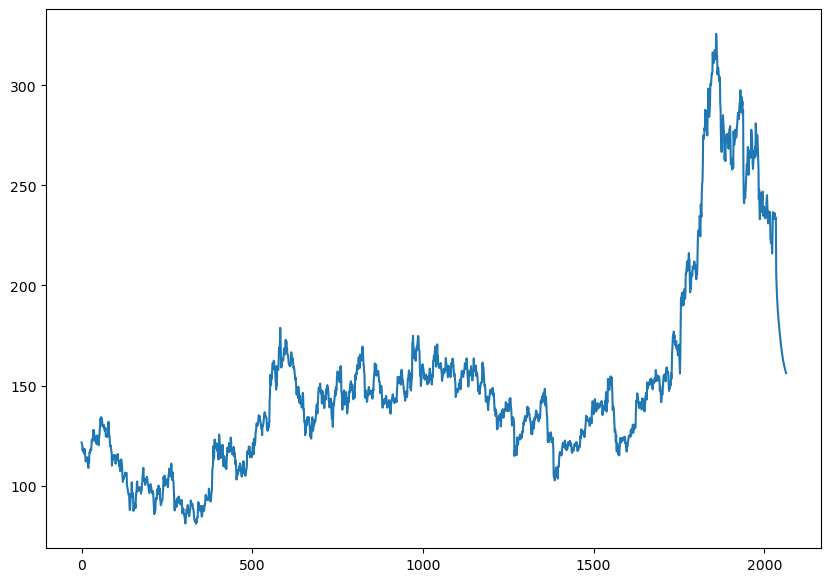

In [72]:
plt.figure(figsize=(10,7))
plt.plot(df3)